<a href="https://colab.research.google.com/github/Jhonkr/SEATEL2019/blob/master/Do_it_yourself_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris dataset

##Import the libraries.

In [0]:
# Libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import load_iris

## Load Dataset

Analyse your dataframe!

In [0]:
# Load dataset
# You can load the dataset from wherever you want, in this case I imported the Iris dataset using "SKlearn datasets" library
iris = load_iris()

list(iris.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [0]:
print(len(iris))
print(type(iris))

6
<class 'sklearn.utils.Bunch'>


In [0]:
# Load the iris dataset with pandas:
# Pandas can read raw data directly from URL.

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"
iris_df = pd.read_csv(url)

print(iris_df.head())
print(iris_df.tail())

# shape
print(iris_df.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
(150, 5)


##Extend the visualization

We are going to work with Pandas

We now have a basic idea about the data. We need to extend that with some visualizations.

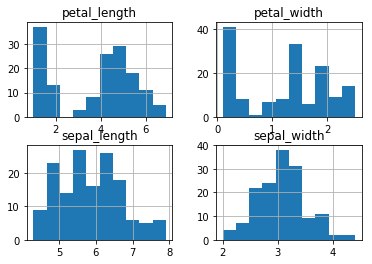

In [0]:
# histograms
iris_df.hist()
plt.show()

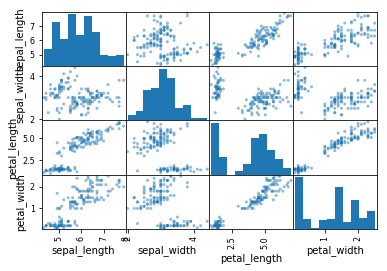

In [0]:
# Lets take a look of all pairs of attributes
scatter_matrix(iris_df)
plt.show()

## Create a validation dataset

More explanation about seed:

https://machinelearningmastery.com/introduction-to-random-number-generators-for-machine-learning/


In [0]:
seed = 13

Split the loaded dataset in two.

80% to train our models and 20% as a validation dataset.

In [0]:
from sklearn import model_selection
array = iris_df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split
(X, Y, test_size=validation_size, random_state=seed)

In [0]:
print(X[0])
print(Y[0])

[5.1 3.5 1.4 0.2]
setosa


In [0]:
print("X_train:",len(X_train))
print("X_validation:",len(X_validation))
print("Y_train:",len(Y_train))
print("Y_validation:",len(Y_validation))

X_train: 120
X_validation: 30
Y_train: 120
Y_validation: 30


##Making prediction

In [0]:
# 1. Create your Machine Learning model, based on what you got and what you need.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [0]:
# 2. Train your Machine Learning model
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
# 3. Make predictions with your separeted validation dataset
predictions = knn.predict(X_validation)

## Results

In [0]:
from sklearn.metrics import classification_report, 
confusion_matrix, accuracy_score

print("My model  accuracy based on KNN Algorithm:",
      accuracy_score(Y_validation, predictions),"\n")

print(classification_report(Y_validation, predictions))

My model  accuracy based on KNN Algorithm: 0.9 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## More supervised algorithms

* Naive Bayes
* Random Forest
* Support Vector Machines
* Nearest Neighbors

[Specifications here](https://scikit-learn.org/stable/supervised_learning.html)

In [0]:
scoring = 'accuracy'

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Support Vector Machines', SVC(gamma='auto')))
models.append(('AdaBoost', AdaBoostClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"{name} - Accuracy: {cv_results.mean()*100}% (+/- {cv_results.std()})\n"
	print(msg)

Logistic Regression - Accuracy: 96.66666666666666% (+/- 0.04082482904638632)

Linear Discriminant Analysis - Accuracy: 97.5% (+/- 0.03818813079129868)

K Nearest Neighbors - Accuracy: 98.33333333333331% (+/- 0.03333333333333335)

Decision Tree - Accuracy: 96.66666666666666% (+/- 0.04082482904638632)

Gaussian NB - Accuracy: 97.5% (+/- 0.053359368645273735)

Support Vector Machines - Accuracy: 99.16666666666666% (+/- 0.025000000000000012)

AdaBoost - Accuracy: 97.5% (+/- 0.03818813079129868)



##Testing another algorithm

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions1 = random_forest.predict(X_validation)

print("Accuracy score:",accuracy_score(Y_validation, predictions1))
#print(confusion_matrix(Y_validation, predictions1))
print(classification_report(Y_validation, predictions1))

Accuracy score: 0.8333333333333334
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.82      0.75      0.78        12
   virginica       0.75      0.82      0.78        11

   micro avg       0.83      0.83      0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30



In [0]:
adab = AdaBoostClassifier()
adab.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [0]:
#AdaBoost documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

predictions2 = adab.predict(X_validation)

print("Accuracy score:", accuracy_score(Y_validation, predictions2))
#print(confusion_matrix(Y_validation, predictions2))
print(classification_report(Y_validation, predictions2))

Accuracy score: 0.8666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

   micro avg       0.87      0.87      0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

